# 🛒 E-Commerce Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

# Sample product catalog
products = [
    ("P001","Classic Leather Bag","Accessories",2500),
    ("P002","Elegant Dress","Clothing",3500),
    ("P003","Running Shoes","Footwear",4200),
    ("P004","Wireless Headphones","Electronics",7200),
    ("P005","Smartphone Case","Electronics",800),
    ("P006","Office Chair","Furniture",6300),
    ("P007","Espresso Machine","Home Appliances",15000),
    ("P008","Scented Candle","Home Decor",600),
    ("P009","Gold Necklace","Jewellery",12000),
    ("P010","Kids Toy Set","Toys",1200)
]

# Generate 500 fake orders
np.random.seed(42)
n_orders = 500
dates = pd.date_range("2024-01-01", periods=365).to_pydatetime().tolist()

orders = []
for i in range(1, n_orders+1):
    order_id = f"O{i:05d}"
    customer_id = f"C{np.random.randint(1,200):04d}"
    product = products[np.random.randint(0,len(products))]
    pid, pname, category, price = product
    quantity = np.random.choice([1,2,3,4], p=[0.6,0.2,0.15,0.05])
    date = np.random.choice(dates)
    revenue = price * quantity
    payment = np.random.choice(["Card","Mpesa","Cash","Paypal"], p=[0.4,0.4,0.1,0.1])
    country = np.random.choice(["Kenya","Uganda","Tanzania","Rwanda"], p=[0.75,0.1,0.1,0.05])
    
    orders.append([order_id, date, customer_id, pid, pname, category, price, quantity, revenue, payment, country])

df_sample = pd.DataFrame(orders, columns=[
    "order_id","order_date","customer_id","product_id","product_name","category",
    "price","quantity","revenue","payment_method","country"
])

# Save to CSV
df_sample.to_csv("ecommerce_sample.csv", index=False)
print("✅ Sample dataset 'ecommerce_sample.csv' created with", len(df_sample), "rows.")

df_sample.head()

✅ Sample dataset 'ecommerce_sample.csv' created with 500 rows.


,order_id,order_date,customer_id,product_id,product_name,category,price,quantity,revenue,payment_method,country
0,O00001,2024-04-16,C0103,P004,Wireless Headphones,Electronics,7200,4,28800,Mpesa,Kenya
1,O00002,2024-03-28,C0122,P003,Running Shoes,Footwear,4200,1,4200,Card,Kenya
2,O00003,2024-12-09,C0131,P006,Office Chair,Furniture,6300,1,6300,Cash,Kenya
3,O00004,2024-11-09,C0192,P005,Smartphone Case,Electronics,800,2,1600,Mpesa,Kenya
4,O00005,2024-07-06,C0049,P010,Kids Toy Set,Toys,1200,1,1200,Card,Kenya


In [3]:
import pandas as pd

# Load the CSV
df = pd.read_csv("ecommerce_sample.csv", parse_dates=["order_date"])
df.head()

,order_id,order_date,customer_id,product_id,product_name,category,price,quantity,revenue,payment_method,country
0,O00001,2024-04-16,C0103,P004,Wireless Headphones,Electronics,7200,4,28800,Mpesa,Kenya
1,O00002,2024-03-28,C0122,P003,Running Shoes,Footwear,4200,1,4200,Card,Kenya
2,O00003,2024-12-09,C0131,P006,Office Chair,Furniture,6300,1,6300,Cash,Kenya
3,O00004,2024-11-09,C0192,P005,Smartphone Case,Electronics,800,2,1600,Mpesa,Kenya
4,O00005,2024-07-06,C0049,P010,Kids Toy Set,Toys,1200,1,1200,Card,Kenya


In [4]:
print(df.shape)
display(df.info())
display(df.isnull().sum())

# Ensure numeric types are correct
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce').fillna(1).astype(int)
df['revenue'] = df['price'] * df['quantity']

# Derive time columns
df['order_month'] = df['order_date'].dt.to_period('M').astype(str)
df['order_day'] = df['order_date'].dt.date
df['order_year'] = df['order_date'].dt.year

# Drop any obviously broken rows
df = df.dropna(subset=['order_date','product_name']).reset_index(drop=True)
print("✅ Cleaned data shape:", df.shape)

(500, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        500 non-null    object        
 1   order_date      500 non-null    datetime64[ns]
 2   customer_id     500 non-null    object        
 3   product_id      500 non-null    object        
 4   product_name    500 non-null    object        
 5   category        500 non-null    object        
 6   price           500 non-null    int64         
 7   quantity        500 non-null    int64         
 8   revenue         500 non-null    int64         
 9   payment_method  500 non-null    object        
 10  country         500 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 43.1+ KB


None

order_id          0
order_date        0
customer_id       0
product_id        0
product_name      0
category          0
price             0
quantity          0
revenue           0
payment_method    0
country           0
dtype: int64

✅ Cleaned data shape: (500, 14)


,product_id,product_name,category,quantity_sold,revenue,orders
0,P009,Gold Necklace,Jewellery,87,1044000,52
1,P007,Espresso Machine,Home Appliances,60,900000,35
2,P004,Wireless Headphones,Electronics,90,648000,49
3,P006,Office Chair,Furniture,76,478800,51
4,P003,Running Shoes,Footwear,85,357000,55
5,P002,Elegant Dress,Clothing,82,287000,57
6,P001,Classic Leather Bag,Accessories,79,197500,57
7,P010,Kids Toy Set,Toys,74,88800,42
8,P005,Smartphone Case,Electronics,84,67200,49
9,P008,Scented Candle,Home Decor,83,49800,53


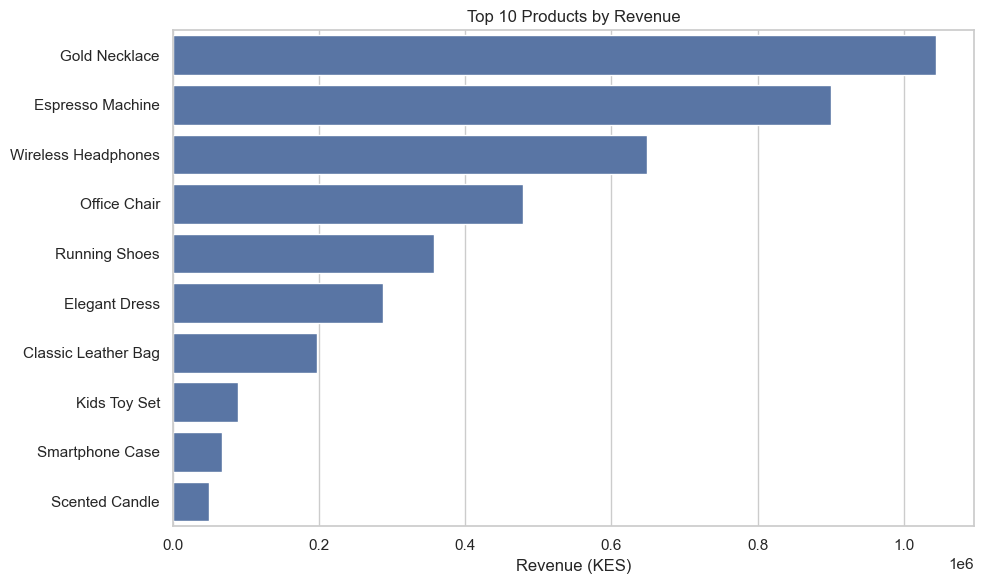

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top products by revenue
top_products = df.groupby(['product_id','product_name','category']) \
                 .agg(quantity_sold=('quantity','sum'),
                      revenue=('revenue','sum'),
                      orders=('order_id','nunique')) \
                 .sort_values('revenue', ascending=False).reset_index()

display(top_products.head(10))

# Plot top 10 by revenue 
plt.figure(figsize=(10,6))
sns.barplot(data=top_products.head(10), x='revenue', y='product_name', dodge=False)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue (KES)")
plt.ylabel("")
plt.tight_layout()
plt.show()

,total_revenue,total_quantity,orders
category,,,
Jewellery,1044000,87,52
Home Appliances,900000,60,35
Electronics,715200,174,98
Furniture,478800,76,51
Footwear,357000,85,55
Clothing,287000,82,57
Accessories,197500,79,57
Toys,88800,74,42
Home Decor,49800,83,53


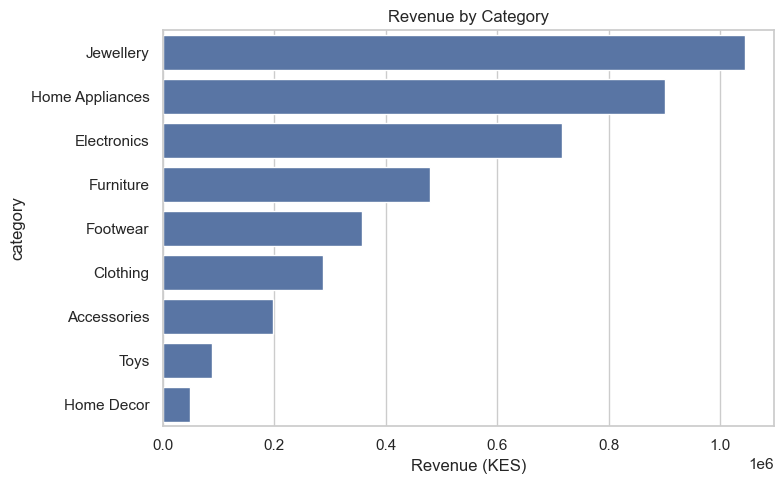

In [6]:
# Aggregate revenue by category
category_perf = df.groupby('category').agg(
    total_revenue=('revenue','sum'),
    total_quantity=('quantity','sum'),
    orders=('order_id','nunique')
).sort_values('total_revenue', ascending=False)

display(category_perf)

# Bar plot for category revenue
plt.figure(figsize=(8,5))
sns.barplot(x=category_perf['total_revenue'].values, y=category_perf.index)
plt.title("Revenue by Category")
plt.xlabel("Revenue (KES)")
plt.tight_layout()
plt.show()

In [7]:
# Total spent & orders per customer
customer_summary = df.groupby('customer_id').agg(
    orders=('order_id','nunique'),
    total_spent=('revenue','sum'),
    avg_order_value=('revenue','mean')
).sort_values('total_spent', ascending=False)

display(customer_summary.head(10))

# RFM (Recency, Frequency, Monetary)
snapshot_date = df['order_date'].max() + pd.Timedelta(days=1)
rfm = df.groupby('customer_id').agg(
    recency=('order_date', lambda x: (snapshot_date - x.max()).days),
    frequency=('order_id', 'nunique'),
    monetary=('revenue', 'sum')
).reset_index()

display(rfm.sort_values('monetary', ascending=False).head(10))

,orders,total_spent,avg_order_value
customer_id,,,
C0047,6,112000,18666.666667
C0120,2,75000,37500.000000
C0060,6,74400,12400.000000
C0004,4,70000,17500.000000
C0122,4,65700,16425.000000
C0027,3,64800,21600.000000
C0189,5,64800,12960.000000
C0139,3,64700,21566.666667
C0177,4,64300,16075.000000


,customer_id,recency,frequency,monetary
41,C0047,25,6,112000
110,C0120,145,2,75000
52,C0060,2,6,74400
2,C0004,148,4,70000
112,C0122,100,4,65700
22,C0027,130,3,64800
171,C0189,101,5,64800
126,C0139,96,3,64700
160,C0177,16,4,64300
98,C0108,12,8,64000


In [8]:
# RFM scoring
rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['m_score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5]).astype(int)

# Combine scores
rfm['RFM_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

display(rfm.head())

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,RFM_score
0,C0001,351,1,3600,1,1,1,111
1,C0002,206,2,13800,1,1,3,113
2,C0004,148,4,70000,2,4,5,245
3,C0005,144,1,800,2,1,1,211
4,C0006,198,1,1200,1,1,1,111


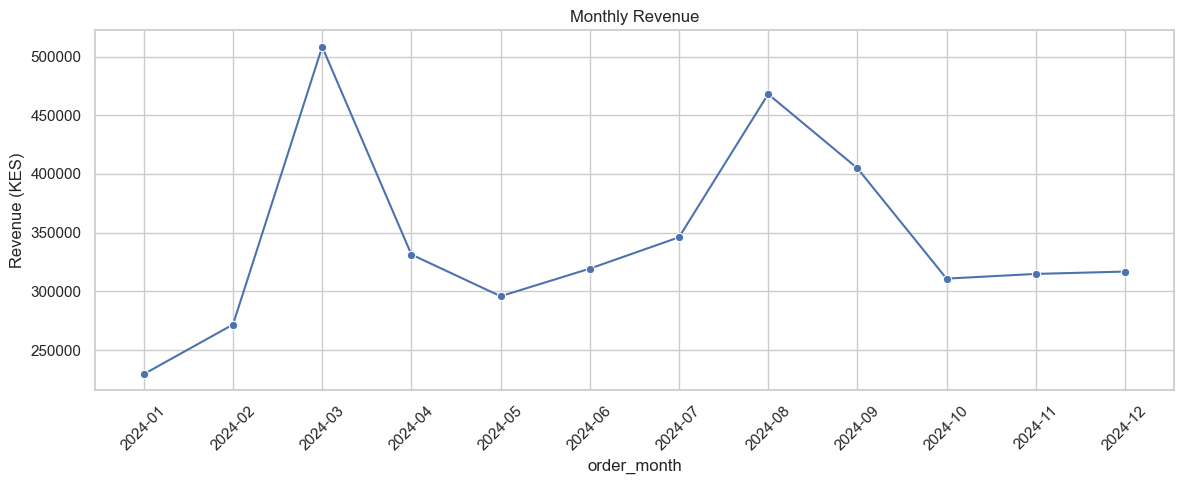

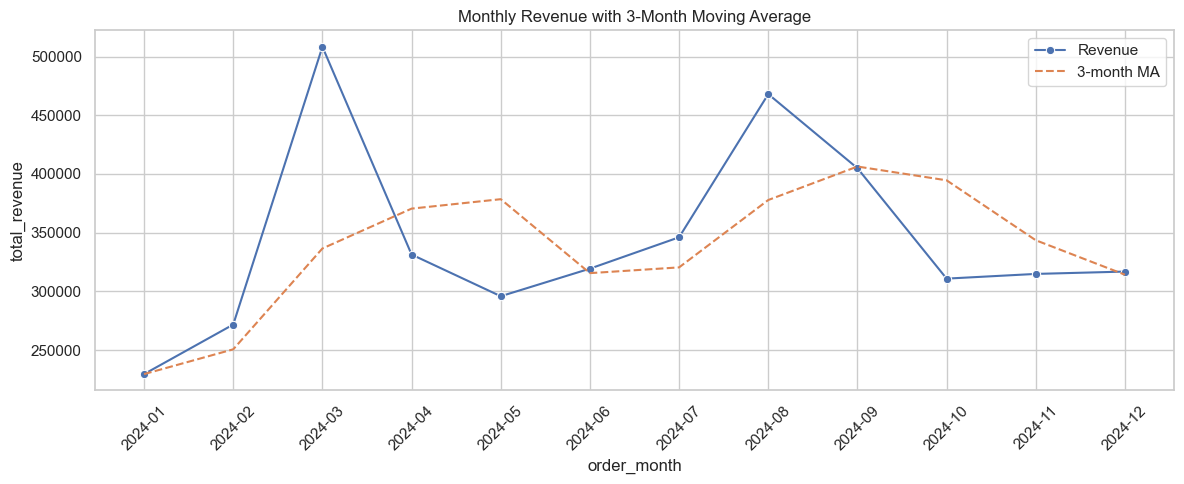

In [9]:
# Monthly revenue
monthly = df.groupby('order_month').agg(
    total_revenue=('revenue','sum'),
    orders=('order_id','nunique')
).sort_index().reset_index()

# Line plot
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly, x='order_month', y='total_revenue', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue")
plt.ylabel("Revenue (KES)")
plt.tight_layout()
plt.show()

# 3-month moving average
monthly['MA3'] = monthly['total_revenue'].rolling(3, min_periods=1).mean()
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly, x='order_month', y='total_revenue', label='Revenue', marker='o')
sns.lineplot(data=monthly, x='order_month', y='MA3', label='3-month MA', linestyle='--')
plt.xticks(rotation=45)
plt.title("Monthly Revenue with 3-Month Moving Average")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

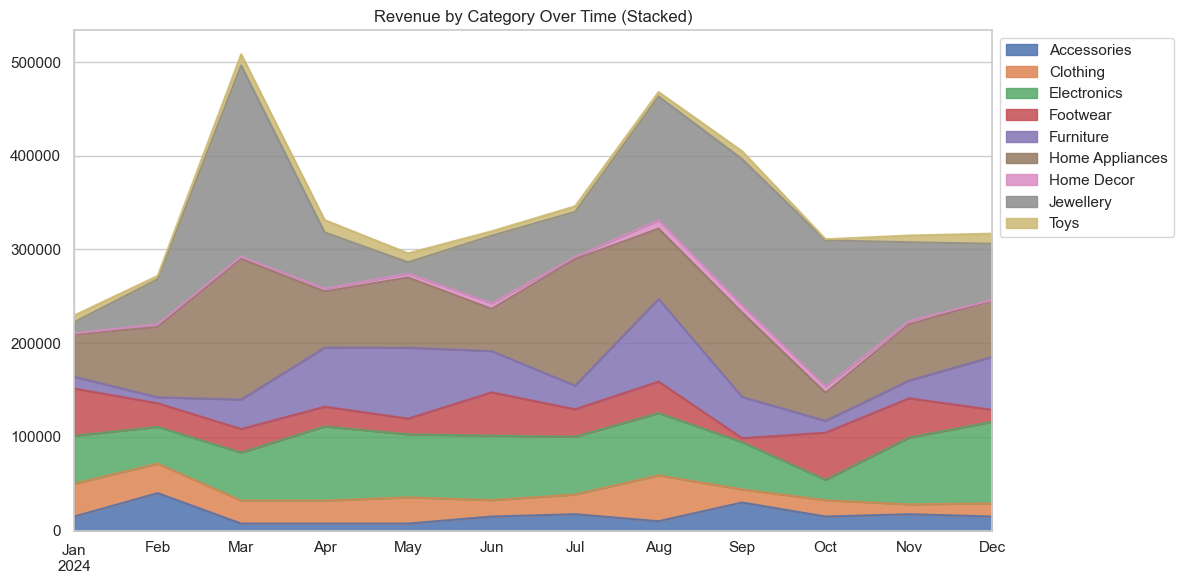

In [10]:
# Monthly revenue by category
cat_month = df.groupby(['order_month','category'])['revenue'].sum().reset_index()
pivot = cat_month.pivot(index='order_month', columns='category', values='revenue').fillna(0)
pivot.index = pd.to_datetime(pivot.index + "-01")

# Stacked area chart
plt.figure(figsize=(12,6))
pivot.sort_index().plot.area(alpha=0.85)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title("Revenue by Category Over Time (Stacked)")
plt.xlabel("")
plt.tight_layout()
plt.show()

✅ Exports completed: CSVs and plot saved.


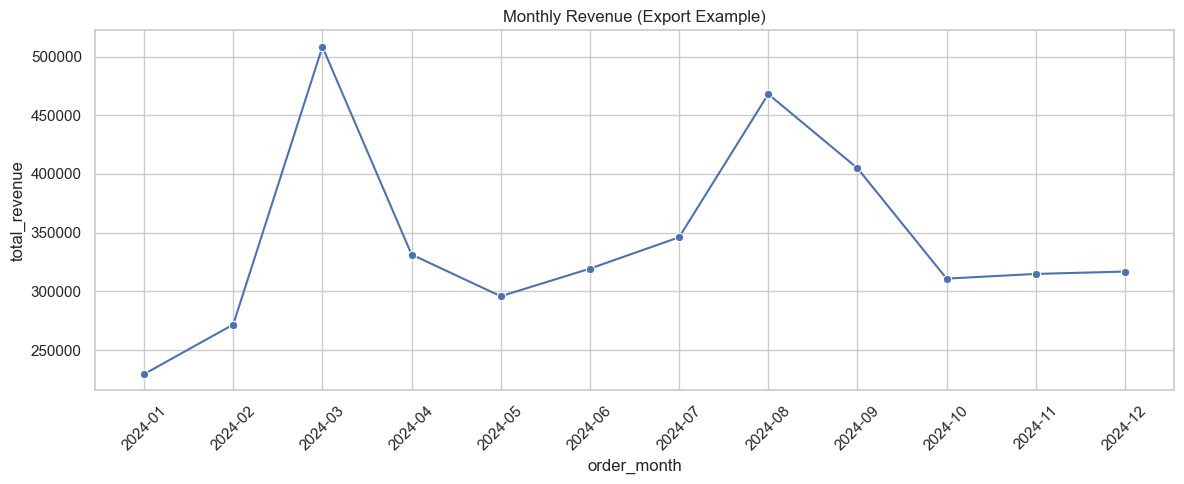

In [11]:
# Export top products and top customers
top_products.head(20).to_csv("top_products_by_revenue.csv", index=False)
customer_summary.sort_values('total_spent', ascending=False).head(100).to_csv("top_customers.csv", index=True)
df.to_csv("ecommerce_cleaned.csv", index=False)

# Save example plot 
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly, x='order_month', y='total_revenue', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue (Export Example)")
plt.tight_layout()
plt.savefig("monthly_revenue.png", dpi=300, bbox_inches='tight')

print("✅ Exports completed: CSVs and plot saved.")

In [12]:
import plotly.express as px
import plotly.graph_objects as go

In [13]:
# KPI calculations
total_revenue = df['revenue'].sum()
total_orders = df['order_id'].nunique()
total_customers = df['customer_id'].nunique()

print(f"💰 Total Revenue: KES {total_revenue:,.0f}")
print(f"🛒 Total Orders: {total_orders}")
print(f"👥 Total Customers: {total_customers}")

💰 Total Revenue: KES 4,118,100
🛒 Total Orders: 500
👥 Total Customers: 182


In [14]:
# Top 10 products by revenue
top10 = top_products.head(10)

fig = px.bar(
    top10, 
    x='revenue', 
    y='product_name', 
    orientation='h',
    color='category',
    text='revenue',
    title="Top 10 Products by Revenue",
    height=500
)
fig.update_layout(yaxis={'categoryorder':'total ascending'}, template='plotly_white')
fig.show()

In [15]:
# Monthly revenue with moving average
fig = go.Figure()

# Actual monthly revenue
fig.add_trace(go.Scatter(
    x=monthly['order_month'],
    y=monthly['total_revenue'],
    mode='lines+markers',
    name='Monthly Revenue',
    line=dict(color='royalblue', width=3)
))

# 3-month moving average
fig.add_trace(go.Scatter(
    x=monthly['order_month'],
    y=monthly['MA3'],
    mode='lines',
    name='3-Month MA',
    line=dict(color='firebrick', width=3, dash='dash')
))

fig.update_layout(
    title="Monthly Revenue with 3-Month Moving Average",
    xaxis_title="Month",
    yaxis_title="Revenue (KES)",
    template='plotly_white',
    height=500
)
fig.show()

In [16]:
# Pivot data for Plotly area chart
pivot = cat_month.pivot(index='order_month', columns='category', values='revenue').fillna(0)
pivot = pivot.sort_index().reset_index()

fig = go.Figure()
for category in pivot.columns[1:]:
    fig.add_trace(go.Scatter(
        x=pivot['order_month'],
        y=pivot[category],
        mode='lines',
        stackgroup='one',
        name=category
    ))

fig.update_layout(
    title="Revenue by Category Over Time",
    xaxis_title="Month",
    yaxis_title="Revenue (KES)",
    template='plotly_white',
    height=500
)
fig.show()

In [17]:
# Top 10 customers by total spent
top_customers = customer_summary.sort_values('total_spent', ascending=False).head(10)

fig = px.bar(
    top_customers,
    x='total_spent',
    y=top_customers.index,
    orientation='h',
    text='total_spent',
    title="Top 10 Customers by Total Spend",
    color='total_spent',
    color_continuous_scale='Viridis',
    height=500
)
fig.update_layout(yaxis={'categoryorder':'total ascending'}, template='plotly_white')
fig.show()

In [18]:
# Save the dashboard as HTML
fig.write_html("ecommerce_dashboard.html")
print("✅ Dashboard saved as 'ecommerce_dashboard.html'. You can open this in any browser.")

✅ Dashboard saved as 'ecommerce_dashboard.html'. You can open this in any browser.


In [19]:
# Pivot data for dropdown interactive chart
pivot_category = df.groupby(['order_month','category'])['revenue'].sum().reset_index()
pivot_category = pivot_category.sort_values('order_month')
pivot_category['order_month'] = pd.to_datetime(pivot_category['order_month'] + "-01")
pivot_category.head()

,order_month,category,revenue
0,2024-01-01,Accessories,15000
1,2024-01-01,Clothing,35000
2,2024-01-01,Electronics,51200
3,2024-01-01,Footwear,50400
4,2024-01-01,Furniture,12600


In [20]:
import plotly.graph_objects as go

categories = pivot_category['category'].unique()
fig = go.Figure()

# Add a trace for each category
for i, cat in enumerate(categories):
    df_cat = pivot_category[pivot_category['category'] == cat]
    fig.add_trace(go.Scatter(
        x=df_cat['order_month'],
        y=df_cat['revenue'],
        mode='lines+markers',
        name=cat,
        visible=(i==0)  # only first category visible initially
    ))

# Create dropdown buttons
buttons = []
for i, cat in enumerate(categories):
    visible = [False]*len(categories)
    visible[i] = True
    buttons.append(dict(label=cat,
                        method="update",
                        args=[{"visible": visible},
                              {"title": f"Revenue Over Time: {cat}"}]))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons)],
    title=f"Revenue Over Time: {categories[0]}",
    xaxis_title="Month",
    yaxis_title="Revenue (KES)",
    template='plotly_white',
    height=500
)

fig.show()

In [21]:
# Prepare top products data for dropdown
top_products = top_products.sort_values('revenue', ascending=False)
fig = go.Figure()

products = top_products['product_name'].unique()
for i, prod in enumerate(products[:10]):  # limit to top 10 products for simplicity
    df_prod = df[df['product_name'] == prod].groupby('order_month')['revenue'].sum().reset_index()
    df_prod['order_month'] = pd.to_datetime(df_prod['order_month'] + "-01")
    fig.add_trace(go.Scatter(
        x=df_prod['order_month'],
        y=df_prod['revenue'],
        mode='lines+markers',
        name=prod,
        visible=(i==0)
    ))

# Dropdown buttons
buttons = []
for i, prod in enumerate(products[:10]):
    visible = [False]*10
    visible[i] = True
    buttons.append(dict(label=prod,
                        method="update",
                        args=[{"visible": visible},
                              {"title": f"Revenue Over Time: {prod}"}]))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons)],
    title=f"Revenue Over Time: {products[0]}",
    xaxis_title="Month",
    yaxis_title="Revenue (KES)",
    template='plotly_white',
    height=500
)

fig.show()

In [22]:
# Save the dashboard with dropdowns
fig.write_html("ecommerce_dashboard_interactive.html")
print("✅ Upgraded interactive dashboard saved as 'ecommerce_dashboard_interactive.html'. You can open this in any browser and all dropdowns will work.")

✅ Upgraded interactive dashboard saved as 'ecommerce_dashboard_interactive.html'. You can open this in any browser and all dropdowns will work.


In [23]:
from plotly.subplots import make_subplots

In [24]:
# Create 2-row subplot
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.5, 0.5],
    row_heights=[0.2, 0.8],
    specs=[[{"type":"domain"}, {"type":"domain"}],
           [{"type":"xy"}, {"type":"xy"}]],
    subplot_titles=("Total Revenue", "Total Orders", "Top Products", "Monthly Revenue")
)

# Add KPI values as annotation in first row (domain type for KPI boxes)
fig.add_trace(go.Indicator(
    mode="number",
    value=total_revenue,
    title={"text":"💰 Total Revenue"},
), row=1, col=1)

fig.add_trace(go.Indicator(
    mode="number",
    value=total_orders,
    title={"text":"🛒 Total Orders"},
), row=1, col=2)

In [25]:
# Top 5 products
top5_products = top_products.head(5)
fig.add_trace(go.Bar(
    x=top5_products['revenue'],
    y=top5_products['product_name'],
    orientation='h',
    name="Top Products",
    marker_color='royalblue',
    text=top5_products['revenue'],
    textposition='auto'
), row=2, col=1)

# Monthly revenue
fig.add_trace(go.Scatter(
    x=monthly['order_month'],
    y=monthly['total_revenue'],
    mode='lines+markers',
    name="Monthly Revenue",
    line=dict(color='firebrick', width=3)
), row=2, col=2)

fig.update_layout(
    height=700,
    template='plotly_white',
    showlegend=False,
    title_text="🛒 E-Commerce Multi-Chart Dashboard"
)

fig.show()

In [26]:
# Recreate pivot for stacked area chart
pivot = cat_month.pivot(index='order_month', columns='category', values='revenue').fillna(0)
pivot = pivot.sort_values('order_month').reset_index()
pivot['order_month'] = pd.to_datetime(pivot['order_month'] + "-01")

# Extend figure to 3 rows
fig = make_subplots(
    rows=3, cols=2,
    column_widths=[0.5, 0.5],
    row_heights=[0.15, 0.4, 0.45],
    specs=[[{"type":"domain"}, {"type":"domain"}],
           [{"type":"xy"}, {"type":"xy"}],
           [{"type":"xy", "colspan":2}, None]],
    subplot_titles=("Total Revenue", "Total Orders", "Top Products", "Monthly Revenue", "Revenue by Category")
)

# KPIs
fig.add_trace(go.Indicator(mode="number", value=total_revenue, title={"text":"💰 Total Revenue"}), row=1, col=1)
fig.add_trace(go.Indicator(mode="number", value=total_orders, title={"text":"🛒 Total Orders"}), row=1, col=2)

# Top Products
fig.add_trace(go.Bar(
    x=top5_products['revenue'],
    y=top5_products['product_name'],
    orientation='h',
    marker_color='royalblue',
    text=top5_products['revenue'],
    textposition='auto'
), row=2, col=1)

# Monthly Revenue
fig.add_trace(go.Scatter(
    x=monthly['order_month'],
    y=monthly['total_revenue'],
    mode='lines+markers',
    line=dict(color='firebrick', width=3)
), row=2, col=2)

# Stacked area chart for categories
for cat in pivot.columns[1:]:
    fig.add_trace(go.Scatter(
        x=pivot['order_month'],
        y=pivot[cat],
        mode='lines',
        stackgroup='one',
        name=cat
    ), row=3, col=1)

fig.update_layout(
    height=900,
    template='plotly_white',
    showlegend=True,
    title_text="🛒 E-Commerce Multi-Chart Dashboard (Full Layout)"
)

fig.show()

In [27]:
fig.write_html("ecommerce_dashboard_full_layout.html")
print("✅ Multi-chart dashboard saved as 'ecommerce_dashboard_full_layout.html'. Open it in any browser to explore interactively.")

✅ Multi-chart dashboard saved as 'ecommerce_dashboard_full_layout.html'. Open it in any browser to explore interactively.
